# Toronto Restaurants Recommendation System and Review Analysis 

Group Members:

* Ashvin Alex
* Bastian Castillo
* Fadernel Bedoya
* Darshan Ruparel
* Marcelo Munoz

Project Description:

* We have scrapped the data from YELP website. Yelp publishes crowd-sourced reviews about businesses.
* We have collected data of 240 Restaurants located in Toronto, Canada.
* Each Restaurant has certain number of review and rating which will be used for analysis purpose
* Using this data, we are going to built content based recommendation system which will recommend top 5 restaurants to user similar to the one he likes
* We will also do sentimental analysis of 35K reviews
* There is one csv file containing the details of 240 restaurants and 240 csv files containing reviews for each restaurant

## Importing the Libraries

In [1]:
import pandas as pd
import openpyxl
import numpy as np
from tqdm import tqdm
from numpy.linalg import norm
from sklearn.metrics.pairwise import linear_kernel

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import geopy.distance

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Data Collection

### Web scrapping of restaurants present in Toronto

In [2]:
### Below code will generate one file containing common data of all restaurant
### No need to run below code again. So it is Markdown.

In [3]:
# from bs4 import BeautifulSoup
# import requests
# import re
# import random
# import pandas as pd
# import openpyxl
# 
# 
# restaurantnames = []
# 
# 
# def add_res_name(search_response):
#     search_results = search_response.json()['searchPageProps']['mainContentComponentsListProps']
# 
#     for result in search_results:
#         if result['searchResultLayoutType'] == "iaResult":
#             rest_name = {
#                 'Name': result['searchResultBusiness']['name'],
#                 'Neighborhoods': result['searchResultBusiness']['neighborhoods'],
#                 'Review Count': result['searchResultBusiness']['reviewCount'],
#                 'Rating': result['searchResultBusiness']['rating'],
#                 'URL': "https://www.yelp.com" + result['searchResultBusiness']['businessUrl']
#             }
# 
#             restaurantnames.append(rest_name)
# 
# 
# def main():
#     url = "https://www.yelp.com/search?find_desc=Restaurants&find_loc=Toronto"
#     html = requests.get(url)
# 
#     #html = requests.get("https://www.yelp.com/biz/piano-piano-toronto-2?osq=Restaurants")
#     soup = BeautifulSoup(html.text, 'html.parser')
#     a = soup.find('div', {'aria-label':'Pagination navigation', 'role':'navigation'})
#     b = a.find('span', {'class': 'css-chan6m'}).text
#     c = re.findall('\d\d', b)
#     totalRestPg = int(c[0])
# 
#     for i in range(totalRestPg):
#         torontoRestUrl = "https://www.yelp.com/search/snippet?find_desc=Restaurants&find_loc=toronto"
# 
#         if i == 0:
#             search_url = torontoRestUrl
#         else:
#             search_url = torontoRestUrl + "&start=" + str(i*10)
# 
#         headers = {'Accept-Encoding': 'gzip'}
#         search_response = requests.get(search_url, headers=headers)
#         add_res_name(search_response)
# 
#     df = pd.DataFrame(restaurantnames)
#     df.to_excel('toronto_restaurants.xlsx', index=False)
# 
# main()

### Web scrapping of customer reviews

In [4]:
### Below code will generate 240 files containing customer reviews of each restaurant
### No need to run below code again. So it is Markdown.

In [5]:
### Latitude and Longitude Co-ordinates using MapQuest API based on restaurant address scrapped from Yelp
### This step is performed manually

In [6]:
# menu = []
# address = []
# rest_menu_address = []
# 
# for i in range(240):
#     totalreviews = []
#     reviewsdate = []
#     reviewloc = []
#     reviewrating = []
# 
#     ReviewCount = 0
#     ReviewCount = int(df['Review Count'][i]) // 10
# 
#     if int(df['Review Count'][i]) % 10 > 0:
#         ReviewCount += 1
#     print("Working on ", df["Name"][i])
# 
#     for j in range(ReviewCount):
#         base_url = df["URL"][i]
#         if j == 0:
#             spec_url = base_url
#         else:
#             spec_url = base_url + "&start=" + str(j * 10)
# 
#         html = requests.get(spec_url)
#         soup = BeautifulSoup(html.text, 'html.parser')
# 
#         # Extract data from main page
#         if j == 0:
#             menu = []
#             # Extarct Menu
#             try:
#                 reviews = soup.find('section', {'class': 'margin-t4__09f24__G0VVf', 'aria-label': 'Menu'})
#                 menu_items = reviews.findAll('p', {'class': 'css-nyjpex'})
#                 for items in menu_items:
#                     menu.append(items.text)
#             except AttributeError:
#                 menu = []
# 
#             address = []
#             # Extract Address
#             try:
#                 reviews = soup.find('section', {'class': 'margin-t4__09f24__G0VVf', 'aria-label': 'Location & Hours'})
#                 address_items = reviews.findAll('span', {'class': 'raw__09f24__T4Ezm'})
#                 for items in address_items:
#                     address.append(items.text)
#             except AttributeError:
#                 address = []
# 
#             menu_address = {'Menu': '\n'.join(menu) if len(menu) > 0 else [],
#                             'Address': '\n'.join(address) if len(address) > 0 else []}
#             rest_menu_address.append(menu_address)
# 
#         # Extract Reviews
#         reviews = soup.findAll('p', {'class': 'comment__09f24__gu0rG css-qgunke'})
#         for k, items in enumerate(reviews):
#             paragraph_element = items.find('span', {'class': 'raw__09f24__T4Ezm'})
#             paragraph = paragraph_element.get_text(separator='\n') if paragraph_element else np.nan
#             totalreviews.append(paragraph)
# 
#         # Extract Review Date
#         reviews = soup.findAll('span', {'class': 'css-chan6m'})
#         for k, items in enumerate(reviews):
#             # print(items.text)
#             if re.search('\d{1,2}.\d{1,2}.\d{4}', items.text):
#                 day = re.search('\d{1,2}.\d{1,2}.\d{4}', items.text)
#                 date = datetime.datetime.strptime(day.group(), '%m/%d/%Y').date()
#                 reviewsdate.append(date)
# 
#         # Extract User location and Review Rating
#         reviews = soup.findAll('div', {'class': 'review__09f24__oHr9V'})
#         for k, items in enumerate(reviews):
#             rating = items.find('div', attrs={'aria-label': re.compile('star rating')})
#             reviewrating.append(rating['aria-label'])
# 
#             b_class = items.findAll(
#                 ('div', {'class': 'responsive-hidden-small__09f24__qQFtj border-color--default__09f24__NPAKY'}))
#             for location in b_class:
#                 if location.find('span', {'class': 'css-qgunke'}):
#                     reviewloc.append(location.find('span', {'class': 'css-qgunke'}).text)
#                     break
# 
#     df1 = pd.DataFrame(list(zip(totalreviews, reviewsdate, reviewloc, reviewrating)),
#                        columns=['Reviews', 'Date', 'Loc', 'Rating'])
# 
#     filename = df['Name'][i] + ".xlsx"
#     df1.to_excel(filename, index=False)
# 
# df2 = pd.DataFrame(rest_menu_address)
# 
# print("Batch Completed Run Next batch")

## Understanding the Data

In [7]:
df_main = pd.read_excel("toronto_restaurants.xlsx")

In [8]:
# Combine 240 files into one file - this step needs to be performed only once

#for i, rest_name in enumerate(df_main['Name']):
#    path = rest_name + ".xlsx"
#    df_temp = pd.read_excel(path)
#    df_temp = df_temp.assign(Rest_Name=rest_name)
#    if i == 0:
#        df = df_temp
#    else:
#        df = pd.concat([df,df_temp], axis=0)

#df.to_excel("Toronto_Restaurants_Reviews.xlsx", index=False)

In [9]:
df = pd.read_excel("Toronto_Restaurants_Reviews.xlsx")

In [10]:
df_loc = pd.read_csv("Toronto_Address_Location.csv")

In [11]:
df_main['latitude'] = df_loc['latitude']
df_main['longitude'] = df_loc['longitude']

In [12]:
df_main.head()

Name                      Neighborhoods  \
0                      Piano Piano  ['Mount Pleasant and Davisville']   
1           KINKA IZAKAYA ORIGINAL                  ['Downtown Core']   
2                      Lao Lao Bar                  ['Downtown Core']   
3                      La Chingada                ['Little Portugal']   
4  Pai Northern Thai Kitchen Yonge             ['Yonge and Eglinton']   

   Review Count  Rating                                                URL  \
0            40     4.0  https://www.yelp.com/biz/piano-piano-toronto-2...   
1          1794     4.0  https://www.yelp.com/biz/kinka-izakaya-origina...   
2             9     4.0  https://www.yelp.com/biz/lao-lao-bar-toronto?o...   
3            59     4.5  https://www.yelp.com/biz/la-chingada-toronto?o...   
4           107     4.0  https://www.yelp.com/biz/pai-northern-thai-kit...   

                                                Menu  \
0  Mushroom Cavatelli\nEgg Yolk Ravioli\nSweet Ho...   
1  Baked Oysters\nFried Chicken\nSalmon Tataki\nB...   
2                                                 []   
3  Fish Taco\nCarne Asada\nChurros\nTinga De Poll...   
4  Pad Thai\nKhao Soi\nPad See Ew\nMango Sticky R...   

                                             Address         Cuisine  \
0  623 Mt Pleasant Road\nToronto, ON M4S 2M9\nCanada         Italian   
1     398 Church Street\nToronto, ON M5B 2A2\nCanada  Japanese\nPubs   
2  5 Saint Joseph Street\nRetail 5\nToronto, ON M...         Laotian   
3  1242 Dundas Street West\nToronto, ON M6J 1X5\n...         Mexican   
4     2335 Yonge Street\nToronto, ON M4P 2E6\nCanada            Thai   

   latitude  longitude  
0  43.70443  -79.38858  
1  43.66053  -79.37881  
2  43.66597  -79.38544  
3  43.64942  -79.42405  
4  43.70859  -79.39873

In [13]:
df.sample(5)

Reviews       Date  \
23481  Yummy Omu! Very traditional Japanese restauran... 2016-12-28   
5444   Before anything, this restaurant is very popul... 2019-12-04   
13898  Skilled bar tenders and a friendly waitstaff. ... 2017-07-28   
31674  After 2 failed attempts (1st went on Sunday an... 2017-09-02   
33232  The wait to get into the restaurant was close ... 2017-03-11   

                   Loc         Rating                            Rest_Name  
23481  Toronto, Canada  5 star rating  Sakawa Coffee & Japanese Restaurant  
5444   Toronto, Canada  5 star rating     Pai Northern Thai Kitchen Duncan  
13898  Toronto, Canada  4 star rating         Insomnia Restaurant & Lounge  
31674  Toronto, Canada  3 star rating                      El Nahual Tacos  
33232  Toronto, Canada  5 star rating                               Maha’s

In [14]:
df_main.shape

(240, 10)

In [15]:
df.shape

(34810, 5)

## Text Wrangling 

In [16]:
# Pre-Process will contain the reviews which are ready to convert into vectors

In [17]:
df['Pre-Process'] = df['Reviews']

In [18]:
# Removing the new line character and replacing with .

In [19]:
for i, review in enumerate(df['Reviews']):
    df['Pre-Process'][i] = re.sub(r"\n", ".",review)

df['Raw_Reviews'] = df['Pre-Process']

/var/folders/vs/p0c7nqmd1k54nytrztdqmgpw0000gn/T/ipykernel_13033/2231209190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pre-Process'][i] = re.sub(r"\n", ".",review)


In [20]:
# Replacing the words like won't with will not so that we can properly remove stop words

In [21]:
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", " would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", " are", s)
 s = re.sub(r"\'s", " is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\'t", " not", s)
 s = re.sub(r"\'ve", " have", s)
 s = re.sub(r"\'m", " am", s)
 return s

df['Pre-Process']=df['Pre-Process'].apply(lambda x:contractions(str(x)))

In [22]:
# Using Regex extracting only the characters

In [23]:
df['Pre-Process'] = df['Pre-Process'].apply(lambda text: re.sub(r"[^a-z\s]", "",str(text).lower()))

In [24]:
# Tokenizing the words

In [25]:
df['Pre-Process'] = df['Pre-Process'].apply(lambda text: word_tokenize(text))

In [26]:
# Removing Stop words

In [27]:
def stop_words(document: list, language: str) -> pd.DataFrame:
    stop_words_list = stopwords.words(language)
    token_list = []
    for token in document:
        if token not in stop_words_list:
            token_list.append(token)
    return token_list

In [28]:
df['Pre-Process'] = df['Pre-Process'].apply(lambda text: stop_words(text, "English"))

In [29]:
# Calculating the Part of Speech tag for each token

In [30]:
df['Pre-Process'] = df['Pre-Process'].apply(lambda text: nltk.pos_tag(text))

In [31]:
def get_pos(tag):
    if tag.startswith("J"):
        return "a"
    elif tag.startswith("V"):
        return "v"
    elif tag.startswith("N"):
        return "n"
    elif tag.startswith("R"):
        return "r"
    else:
        return "n"

In [32]:
# Lematizing the words

In [33]:
lem = WordNetLemmatizer()

In [34]:
def lematize(lem: WordNetLemmatizer, document: list) -> list:
    lemmatized_document = []
    for token in document:
        pos = get_pos(token[1])
        lemmatized_document.append(lem.lemmatize(token[0], pos=pos))
    return " ".join(lemmatized_document)

In [35]:
df['Pre-Process'] = df['Pre-Process'].apply(lambda text: lematize(lem=lem, document=text))

In [36]:
# Removing star rating from Rating column so that it contains numbers only

In [37]:
df['Rating'] = df['Rating'].apply(lambda text: re.sub(r" star rating", "", text))

In [38]:
# Creating new column 'label' which will contain 1 if Rating >= 4 else 0

In [39]:
df['Rating']=df['Rating'].astype(int)
df['label']=np.where(df['Rating']>=4,1,0) #1-Positve,0-Negative

## EDA + Visualization

### GeoMap of restaurants

In [40]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df_loc, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="name", 
                        hover_data=["name"],
                        #color="Listed",
                        color_continuous_scale=color_scale,
                        #size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [41]:
mapbox_access_token = "pk.eyJ1IjoiZGFyc2hhbi1ydXBhcmVsMjQiLCJhIjoiY2xnN2h4cHBuMDVpaTNzb2l0NHNrN2xzciJ9.xhBTc2jtmkHmZpUecfexOg"

fig = go.Figure(go.Scattermapbox(
        lat=df_loc['latitude'],
        lon=df_loc['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),
        text=df_main['Name'],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=43.651070,
            lon=-79.347015
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()

### Rating Counts

In [42]:
rating_count = df['Rating'].value_counts()

In [43]:
percentage = [round((rating_count[5]/len(df))*100,2),
              round((rating_count[4]/len(df))*100,2),
              round((rating_count[3]/len(df))*100,2),
              round((rating_count[2]/len(df))*100,2),
              round((rating_count[1]/len(df))*100,2),
             ]

([<matplotlib.patches.Wedge at 0x147898160>,
 [Text(0.02418820826607655, 1.099734027199703, '5'),
  Text(-0.637584631478514, -0.8963737154236551, '4'),
  Text(0.7292560254940215, -0.823520278609254, '3'),
  Text(1.0284991163229333, -0.3901148135138496, '2'),
  Text(1.093011422586983, -0.12379834447350216, '1')],
 [Text(0.013193568145132662, 0.5998549239271106, '49.30'),
  Text(-0.3477734353519167, -0.4889311175038118, '31.72'),
  Text(0.3977760139058299, -0.4491928792414112, '11.03'),
  Text(0.5609995179943271, -0.21278989828028155, '4.36'),
  Text(0.5961880486838088, -0.06752636971281935, '3.59')])

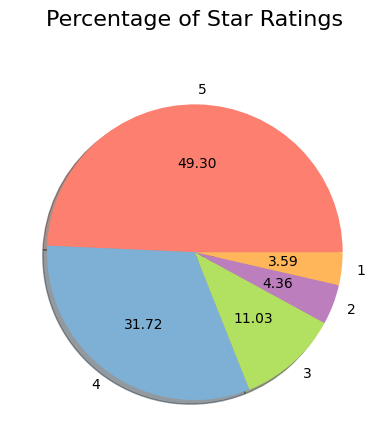

In [44]:
ratings = [5,4,3,2,1]
colors = ['#fd7f6f','#7eb0d5','#b2e061','#bd7ebe', '#ffb55a']
plt.title('Percentage of Star Ratings',fontsize=16, pad=30.0) 
plt.pie(percentage,
        labels=ratings,
        autopct="%0.2f",
        shadow=True,
        colors=colors)

### Top 10 Restaurant by Reviews

In [45]:
top_10_Rest = df_main.sort_values(['Review Count'], ascending=False).iloc[:10]

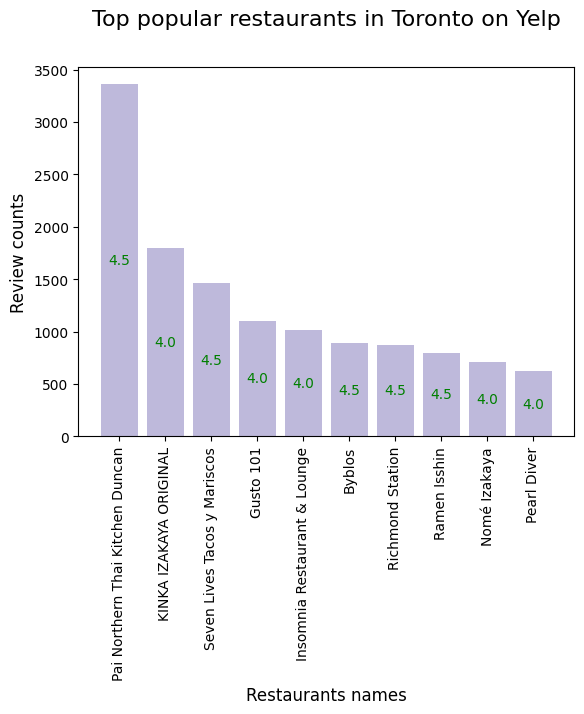

In [46]:
barplot = plt.bar(top_10_Rest['Name'], top_10_Rest['Review Count'], color='#beb9db')
plt.bar_label(barplot, labels=top_10_Rest['Rating'], label_type='center', color='green')
plt.title('Top popular restaurants in Toronto on Yelp',fontsize=16, pad=30.0) 
plt.xlabel('Restaurants names', fontsize=12)
plt.ylabel('Review counts', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.show()

### Distribution of user activity by review over years

Text(-3.6805555555555554, 0.5, 'Review Count')

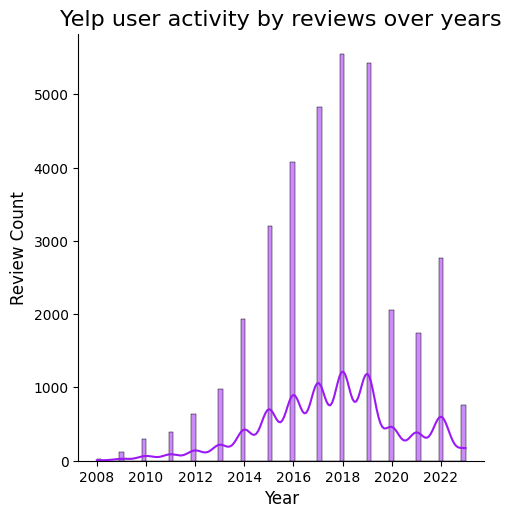

In [47]:
sns.displot(df.Date.dt.year, color='#9b19f5', kde=True)
plt.title('Yelp user activity by reviews over years',fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Review Count', fontsize=12)

### Top 5 Neighborhoods As per Restaurant Count

In [48]:
neighbor = df_main.groupby(df_main['Neighborhoods']).count()

In [49]:
neighbor = neighbor.sort_values(['Name'], ascending=False).iloc[1:6]

In [50]:
neighbor = neighbor.reset_index().rename(columns={'index': 'Id'})

In [51]:
neighbor

Neighborhoods  Name  Review Count  Rating  URL  Menu  \
0  ['Mount Pleasant and Davisville']    25            25      25   25    25   
1                  ['Downtown Core']    18            18      18   18    18   
2             ['Yonge and Eglinton']    11            11      11   11    11   
3                      ['Yorkville']    10            10      10   10    10   
4                      ['Greektown']     9             9       9    9     9   

   Address  Cuisine  latitude  longitude  
0       25       25        25         25  
1       18       18        18         18  
2       11       11        11         11  
3       10       10        10         10  
4        9        9         9          9

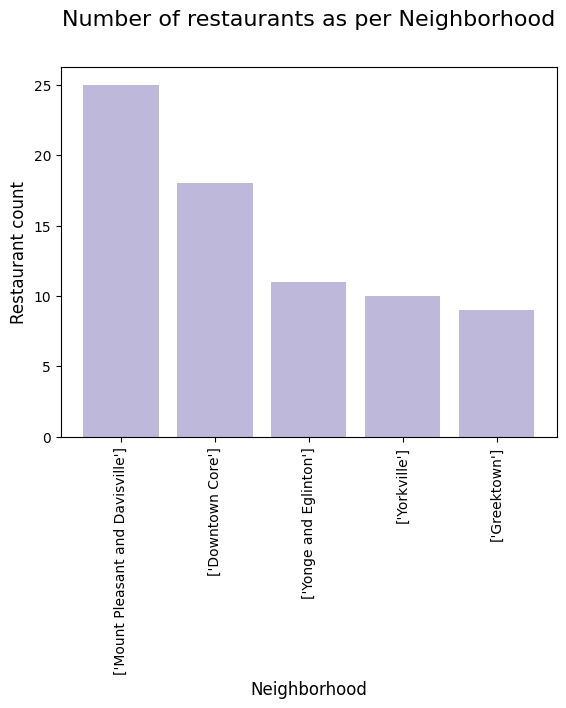

In [52]:
barplot = plt.bar(neighbor['Neighborhoods'], neighbor['Name'], color='#beb9db')
#plt.bar_label(barplot, labels=top_10_Rest['Rating'], label_type='center', color='green')
plt.title('Number of restaurants as per Neighborhood',fontsize=16, pad=30.0) 
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Restaurant count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.show()

### Word Cloud Of Top 5 Neighborhood’s Cuisine

In [53]:
cuisines_neigh = []
for i in range(5):
    cuisine_ = df_main[df_main['Neighborhoods'] == neighbor['Neighborhoods'][i]]['Cuisine']
    for j in cuisine_:
        temp = j.split("\n")
        for k in temp:
            cuisines_neigh.append(k)

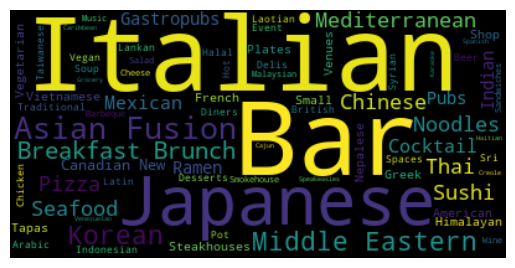

In [54]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(cuisines_neigh))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Average Star Rating Of Reviews By Month

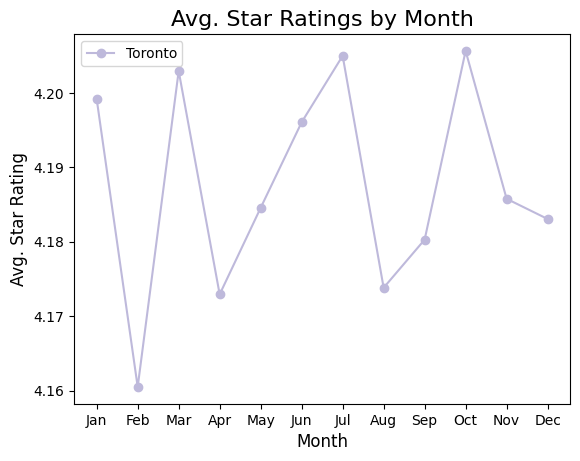

In [55]:
df.groupby(df.Date.dt.month).Rating.mean().plot(label = 'Toronto', marker = 'o', color='#beb9db')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Avg. Star Rating', fontsize=12)
plt.title('Avg. Star Ratings by Month', fontsize=16)
plt.legend()
plt.show()

### Average Star Rating Of Reviews By Year

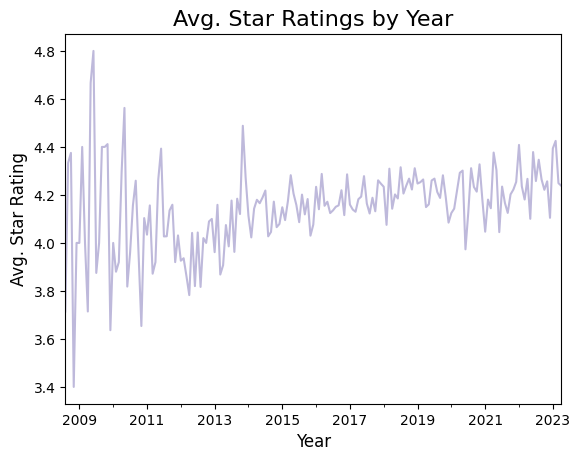

In [56]:
monthly_pitt = df.Date.dt.to_period("M")
df.groupby(monthly_pitt).Rating.mean().plot(color='#beb9db')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg. Star Rating', fontsize=12)
plt.title('Avg. Star Ratings by Year', fontsize=16)
plt.show()

### Do people from other province visit toronto restaurants

In [57]:
province_o = []
for i in df['Loc']:
    if re.search("Toronto",i):
        pass
    else:
        if re.search("Canada",i):
            province_o.append(i)

In [58]:
df[df.Loc.isin(province_o)].groupby('Loc').count().sort_values('Reviews', ascending=False).iloc[0:10]

Reviews  Date  Rating  Rest_Name  Pre-Process  \
Loc                                                                    
Markham, Canada           1513  1513    1513       1513         1513   
Mississauga, Canada        904   904     904        904          904   
Richmond Hill, Canada      614   614     614        614          614   
Vancouver, Canada          393   393     393        393          393   
Vaughan, Canada            385   385     385        385          385   
North York, Canada         282   282     282        282          282   
Brampton, Canada           253   253     253        253          253   
Oakville, Canada           165   165     165        165          165   
Montreal, Canada           162   162     162        162          162   
Scarborough, Canada        150   150     150        150          150   

                       Raw_Reviews  label  
Loc                                        
Markham, Canada               1513   1513  
Mississauga, Canada            904    904  
Richmond Hill, Canada          614    614  
Vancouver, Canada              393    393  
Vaughan, Canada                385    385  
North York, Canada             282    282  
Brampton, Canada               253    253  
Oakville, Canada               165    165  
Montreal, Canada               162    162  
Scarborough, Canada            150    150

### Do people from other countries visit toronto restaurants

In [59]:
countries_o = []
for i in df['Loc']:
    if re.search("Canada",i):
        pass
    else:
        countries_o.append(i)

In [60]:
df[df.Loc.isin(countries_o)].groupby('Loc').count().sort_values('Reviews', ascending=False).iloc[0:10]

Reviews  Date  Rating  Rest_Name  Pre-Process  Raw_Reviews  \
Loc                                                                             
San Francisco, CA      414   414     414        414          414          414   
New York, NY           352   352     352        352          352          352   
Los Angeles, CA        191   191     191        191          191          191   
Chicago, IL            182   182     182        182          182          182   
Seattle, WA            127   127     127        127          127          127   
Brooklyn, NY           116   116     116        116          116          116   
Manhattan, NY          116   116     116        116          116          116   
Boston, MA             109   109     109        109          109          109   
Washington, DC          90    90      90         90           90           90   
Philadelphia, PA        90    90      90         90           90           90   

                   label  
Loc                       
San Francisco, CA    414  
New York, NY         352  
Los Angeles, CA      191  
Chicago, IL          182  
Seattle, WA          127  
Brooklyn, NY         116  
Manhattan, NY        116  
Boston, MA           109  
Washington, DC        90  
Philadelphia, PA      90

### Named Entity Recognition

In [61]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/darshanruparel/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/darshanruparel/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [62]:
#sentences = df.query('Rating > 3 and Rest_Name.str.startswith("Piano").values')['Raw_Reviews'].apply(lambda text: sent_tokenize(text))

In [63]:
sentences = df.query('Rating > 3 ')['Raw_Reviews'].apply(lambda text: sent_tokenize(text))

In [64]:
def find_ner(sentences): 
    token_sentences = sentences.apply(lambda sentences: [word_tokenize(sent) for sent in sentences])
    pos_sentences = token_sentences.apply(lambda tokens_s: [nltk.pos_tag(sent) for sent in tokens_s])
    chunked_sentences = pos_sentences.apply(lambda pos_s: nltk.ne_chunk_sents(pos_s, binary=True))
    
    chunks = []
    for chunk_s in chunked_sentences:
        chunk_l = []
        for parser in chunk_s:
            for chunk in parser:
                if hasattr(chunk, "label") and chunk.label() == 'NE':
                    for i in chunk:
                        chunk_l.append(i[0])
        chunk_dict = {
            'Chunk' : ' '.join(chunk_l),
        }
        chunks.append(chunk_dict)
    
    df_chunk = pd.DataFrame(chunks)
    df_chunk['Rest_Name'] = df['Rest_Name']
    
    text = []
    for chunk in df_chunk.iterrows():
        try:
            text.append(chunk[1]['Chunk'])
        except KeyError:
            pass
        
    ner = ' '.join(text)
    ner1 = ner.split()
    
    counter_dict = nltk.FreqDist(ner1)
    menu_s = []
    not_menu_s = []
    for i in list(counter_dict):
        menu_found = False
        for j in df_main.iterrows():
            if i in j[1]['Menu']:
                menu_found = True
                if i in menu_s:
                    pass
                else:
                    menu_s.append(i)
    
                break
    
        if menu_found == False:
            if i in not_menu_s:
                pass
            else:
                not_menu_s.append(i)
    
    return menu_s, not_menu_s


In [65]:
sentences = df.query('Rating > 3 ')['Raw_Reviews'].apply(lambda text: sent_tokenize(text))
menu_s_pos, not_menu_s_pos = find_ner(sentences)

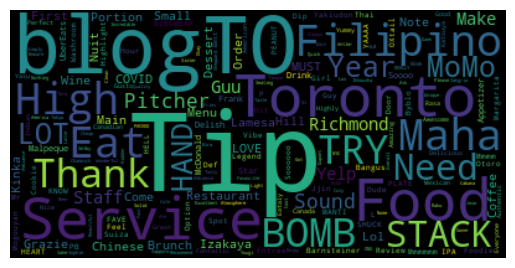

In [66]:
# Create and generate a word cloud image for POSITIVE reviews with words not related to any dish
wordcloud = WordCloud().generate(' '.join(not_menu_s_pos))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

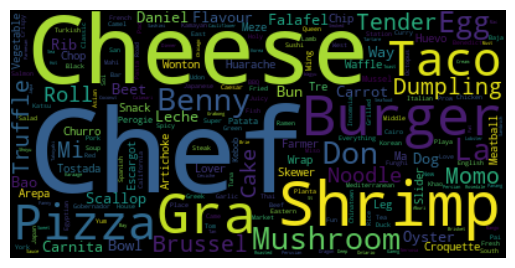

In [67]:
# Create and generate a word cloud image for POSITIVE reviews with words related to dish
wordcloud = WordCloud().generate(' '.join(menu_s_pos))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
sentences = df.query('Rating <= 3')['Raw_Reviews'].apply(lambda text: sent_tokenize(text))
menu_s_neg, not_menu_s_neg = find_ner(sentences)

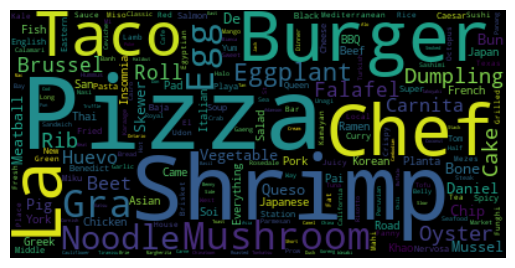

In [69]:
# Create and generate a word cloud image for NEGATIVE reviews with words related to any dish
wordcloud = WordCloud().generate(' '.join(menu_s_neg))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

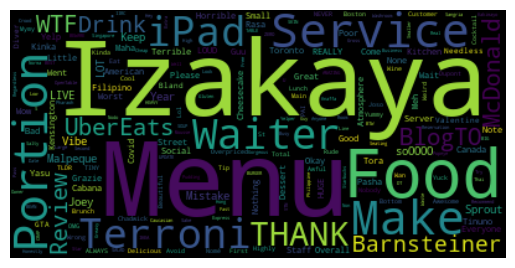

In [70]:
# Create and generate a word cloud image for NEGATIVE reviews with words not related to any dish
wordcloud = WordCloud().generate(' '.join(not_menu_s_neg))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## TF-IDF

In [71]:
# Train Test split using the result of pre-processing

In [72]:
X_train,X_test,Y_train, Y_test = train_test_split(df['Pre-Process'], df['label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (26107,) (26107,) Test:  ((8703,), (8703,))


In [73]:
# Vectorizing the words using TFIDF

In [74]:
vectorizer = TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

## Sentiment Prediction using SVM

In [75]:
clf = LinearSVC(random_state=0)

In [76]:
clf.fit(tf_x_train,Y_train)

LinearSVC(random_state=0)

In [77]:
y_test_pred=clf.predict(tf_x_test)

In [78]:
report=classification_report(Y_test, y_test_pred,output_dict=True)

In [79]:
report['accuracy']

0.8988854418016776

## Sentiment Prediction using RandomForest Classifier

In [80]:
rf = RandomForestClassifier()

In [81]:
rf.fit(tf_x_train, Y_train)

RandomForestClassifier()

In [82]:
y_test_pred = rf.predict(tf_x_test)

In [83]:
report=classification_report(Y_test, y_test_pred,output_dict=True)

In [84]:
report['accuracy']

0.8456853958405147

## Vader Sentiment Analysis

In [85]:
Vader_SA = SentimentIntensityAnalyzer()

In [86]:
df['Raw_Reviews'][13891:13892].apply(lambda text: Vader_SA.polarity_scores(text))

13891    {'neg': 0.078, 'neu': 0.859, 'pos': 0.064, 'co...
Name: Raw_Reviews, dtype: object

In [87]:
# Run the polarity score on the entire dataset
res = {}
j = 0
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Raw_Reviews']
    res[j] = Vader_SA.polarity_scores(text)
    j += 1

100%|███████████████████████████████████| 34810/34810 [00:20<00:00, 1734.37it/s]


In [88]:
len(res), j

(34810, 34810)

In [89]:
df = df.reset_index().rename(columns={'index': 'Id'})
#df = df.drop(columns='Id',axis=0)
#df.set_index(inplace=True, keys=['Id'])

In [90]:
vaders = pd.DataFrame(res).T

In [91]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

In [92]:
vaders.shape, df.shape

((34810, 5), (34810, 9))

In [93]:
vaders = vaders.merge(df, how='left', on='Id')

In [94]:
vaders.shape

(34810, 13)

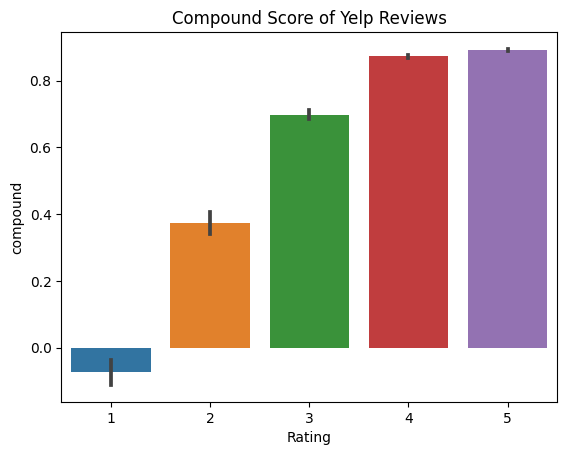

In [95]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound Score of Yelp Reviews')
plt.show()

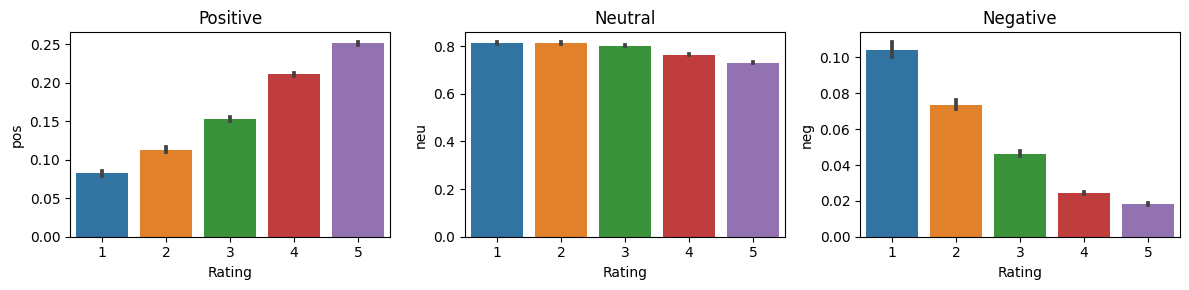

In [96]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [97]:
vaders.query('Rating == 1') \
    .sort_values('pos', ascending=False)['Raw_Reviews'].values[0]

'They always tell you "10-15 minutes" but you can be awaiting an hour so just make sure your party is prepared to wait. Good food'

In [98]:
vaders.query('Rating == 5') \
    .sort_values('neg', ascending=False)['Raw_Reviews'].values[0]

"Fried mushroom & spinach dumplings were fire! General Tao's chicken was fire! Fried rice was fire!"

In [99]:
vaders.query('Rating == 1 and compound > 0.5') \
    .sort_values('pos', ascending=False)['Raw_Reviews'].count()

387

In [100]:
vaders.query('Rating == 5 and compound < -0.5') \
    .sort_values('neg', ascending=False)['Raw_Reviews'].count()

68

In [101]:
vaders.query('Rating == 2 and compound > 0.5') \
    .sort_values('pos', ascending=False)['Raw_Reviews'].count()

859

## RoBERTa

In [102]:
# Below code is implemeted using Kaggle services for better performance

In [103]:
# from transformers import AutoTokenizer
# from transformers import AutoModelForSequenceClassification
# from scipy.special import softmax
# import pandas as pd
# import re
# from tqdm import tqdm
# 
# MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)
# 
# df = pd.read_excel("/kaggle/input/toronto-restaurant/Toronto_Restaurants_Reviews.xlsx")
# df['Pre-Process'] = df['Reviews']
# 
# for i, review in enumerate(df['Reviews']):
#     df['Pre-Process'][i] = re.sub(r"\n", ".", review)
# 
# df['Raw_Reviews'] = df['Pre-Process']
# 
# 
# def polarity_scores_roberta(example):
#     try:
#         encoded_text = tokenizer(example, return_tensors='pt')
#         output = model(**encoded_text)
#         scores = output[0][0].detach().numpy()
#         scores = softmax(scores)
#         scores_dict = {
#             'roberta_neg': scores[0],
#             'roberta_neu': scores[1],
#             'roberta_pos': scores[2]
#         }
#         return scores_dict
#     except IndexError:
#         scores_dict = {
#             'roberta_neg': 0,
#             'roberta_neu': 0,
#             'roberta_pos': 0
#         }
#         return scores_dict
# 
# 
# df = df.reset_index().rename(columns={'index': 'Id'})
# 
# res_r = {}
# j = 0
# 
# for i, row in tqdm(df.iterrows(), total=len(df)):
#     try:
#         text = row['Raw_Reviews']
#         myid = row['Id']
#         # if len(text) > 2000:
#         #    j += 1
#         res_r[myid] = polarity_scores_roberta(text)
#     except RuntimeError:
#         print(f'Broke for id {myid}')
# 
# ### Below code is executed as for some reviews, tokenizer was unable to generate encoded tokens
# j = 0
# for i in range(len(df)):
#     if i in res_r:
#         pass
#     else:
#         try:
#             text = df['Raw_Reviews'][i]
#             myid = df['Id'][i]
#             # print(len(text))
#             res_r[i] = polarity_scores_roberta(text[0:2000])
#         except RuntimeError:
#             j += 1
#             print(f'Broke for id {i}')
# 
# j = 0
# for i in range(len(df)):
#     if i in res_r:
#         pass
#     else:
#         scores_dict = {
#             'roberta_neg': 0,
#             'roberta_neu': 0,
#             'roberta_pos': 0
#         }
#         res_r[i] = scores_dict
# 
# ### Sorting the dictionary containing scores
# myKeys = list(res_r.keys())
# myKeys.sort()
# sorted_dict = {i: res_r[i] for i in myKeys}
# 
# robertas = robertas.reset_index().rename(columns={'index': 'Id'})
# robertas1 = robertas.merge(df, how='left', on='Id')
# robertas1.to_excel("robertas_final1.xlsx", index=False)


In [104]:
df_roberta = pd.read_excel('robertas_final1.xlsx')

In [105]:
df_roberta.sample(5)

Id  roberta_neg  roberta_neu  roberta_pos  \
6766    6766     0.004958     0.018742     0.976300   
21567  21567     0.002021     0.024483     0.973496   
15970  15970     0.004520     0.043545     0.951936   
15516  15516     0.936238     0.056238     0.007523   
14125  14125     0.001296     0.007264     0.991440   

                                                 Reviews       Date  \
6766   It has great ambiance with pub feeling. We too... 2019-04-22   
21567  Heard about this place in instagram and rode o... 2019-07-15   
15970  After coming here a gazillion times, I have to... 2014-11-20   
15516  The picture below was $16 per dish not includi... 2016-02-10   
14125  Very yummy brunch, very fast and great service... 2018-11-13   

                                Loc         Rating  \
6766   Old Toronto, Toronto, Canada  4 star rating   
21567              Brampton, Canada  4 star rating   
15970               Toronto, Canada  5 star rating   
15516               Gormley, Canada  1 star rating   
14125               Toronto, Canada  4 star rating   

                              Rest_Name  \
6766   Pai Northern Thai Kitchen Duncan   
21567             Beach Hill Smokehouse   
15970              The Hole In the Wall   
15516                     Little Sister   
14125      Insomnia Restaurant & Lounge   

                                             Pre-Process  \
6766   It has great ambiance with pub feeling. We too...   
21567  Heard about this place in instagram and rode o...   
15970  After coming here a gazillion times, I have to...   
15516  The picture below was $16 per dish not includi...   
14125  Very yummy brunch, very fast and great service...   

                                             Raw_Reviews  
6766   It has great ambiance with pub feeling. We too...  
21567  Heard about this place in instagram and rode o...  
15970  After coming here a gazillion times, I have to...  
15516  The picture below was $16 per dish not includi...  
14125  Very yummy brunch, very fast and great service...

In [106]:
df_roberta.shape

(34810, 11)

In [107]:
df_roberta[["roberta_neg", "roberta_neu", "roberta_pos"]].max(axis=1)

0        0.896503
1        0.922052
2        0.954306
3        0.987795
4        0.905655
           ...   
34805    0.978682
34806    0.989390
34807    0.984810
34808    0.917747
34809    0.983920
Length: 34810, dtype: float64

In [108]:
sent_rob = []
for i in df_roberta.iterrows():
    neg = i[1]['roberta_neg']
    neu = i[1]['roberta_neu']
    pos = i[1]['roberta_pos']
    
    max_s = max(neg,neu,pos)
    if max_s == neg:
        sent_rob.append("Negative")
    elif max_s == neu:
        sent_rob.append("Neutral")
    elif max_s == pos:
        sent_rob.append("Positive")

In [109]:
len(sent_rob)

34810

In [110]:
df_roberta['Sentiment'] = sent_rob

In [111]:
df_roberta.sample(5)

Id  roberta_neg  roberta_neu  roberta_pos  \
29141  29141     0.025482     0.295839     0.678679   
6182    6182     0.001699     0.018194     0.980107   
17915  17915     0.112031     0.223035     0.664934   
783      783     0.001462     0.009632     0.988906   
6574    6574     0.002507     0.068684     0.928810   

                                                 Reviews       Date  \
29141  Not too far off from Nathan Phillips Square an... 2019-04-19   
6182   Second time I've been here and it's always gre... 2018-08-07   
17915  Great location in King west. \nQuality: food w... 2022-10-22   
783    If you want to go out with friends for a few d... 2011-05-12   
6574   Went here for lunch and found it packed! The w... 2017-08-25   

                   Loc         Rating                         Rest_Name  \
29141  Markham, Canada  4 star rating                    Ikkousha Ramen   
6182        Saline, MI  5 star rating  Pai Northern Thai Kitchen Duncan   
17915       Austin, TX  3 star rating                         Gusto 101   
783    Toronto, Canada  5 star rating            KINKA IZAKAYA ORIGINAL   
6574        Queens, NY  5 star rating  Pai Northern Thai Kitchen Duncan   

                                             Pre-Process  \
29141  Not too far off from Nathan Phillips Square an...   
6182   Second time I've been here and it's always gre...   
17915  Great location in King west. .Quality: food wa...   
783    If you want to go out with friends for a few d...   
6574   Went here for lunch and found it packed! The w...   

                                             Raw_Reviews Sentiment  
29141  Not too far off from Nathan Phillips Square an...  Positive  
6182   Second time I've been here and it's always gre...  Positive  
17915  Great location in King west. .Quality: food wa...  Positive  
783    If you want to go out with friends for a few d...  Positive  
6574   Went here for lunch and found it packed! The w...  Positive

In [112]:
df_roberta['Sentiment'].value_counts()

Positive    30225
Negative     3454
Neutral      1131
Name: Sentiment, dtype: int64

In [113]:
df['Rating'].value_counts()

5    17160
4    11043
3     3840
2     1516
1     1251
Name: Rating, dtype: int64

In [114]:
df_roberta['Rating'] = df_roberta['Rating'].apply(lambda text: re.sub(r" star rating", "", text))

In [115]:
df_roberta = df_roberta.sort_values('roberta_pos', ascending=False)

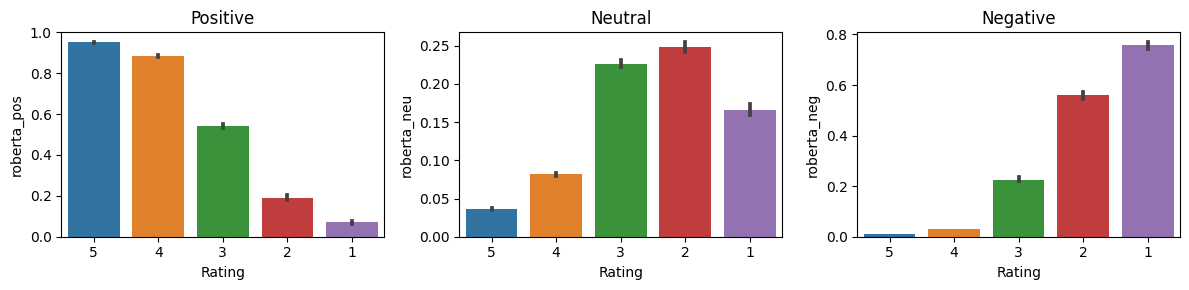

In [116]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df_roberta, x='Rating', y='roberta_pos', ax=axs[0])
sns.barplot(data=df_roberta, x='Rating', y='roberta_neu', ax=axs[1])
sns.barplot(data=df_roberta, x='Rating', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Cosine Similarity for Restaurant Recommendation System

In [117]:
df_roberta = pd.read_excel('robertas_final1.xlsx')

In [118]:
df_roberta.shape

(34810, 11)

In [119]:
df['roberta_pos'] = df_roberta['roberta_pos']
df['roberta_neu'] = df_roberta['roberta_neu']
df['roberta_neg'] = df_roberta['roberta_neg']

In [120]:
### Find NER's for all restaurants based on all reveiws

In [121]:
def find_ners():
    list_ners = []
    for i in df_main.iterrows():
        rest_name_s = []
        rest_name_s.append(str(i[1]['Name']))
        new_df = df.query('Rating > 3')
        new_df = new_df[new_df['Rest_Name'].isin(rest_name_s)]
        sentences = new_df['Raw_Reviews'].apply(lambda text: sent_tokenize(text))
        menu__pos, not_menu__pos = find_ner(sentences)
        dict_temp = {
            'menu_pos': ' '.join(menu__pos),
            'not_menu_pos': ' '.join(not_menu__pos)
        }
        list_ners.append(dict_temp)
    
    return list_ners
        

In [122]:
list_ners = find_ners()

In [123]:
ners_df = pd.DataFrame(list_ners)

In [124]:
ners_df = ners_df.reset_index().rename(columns={'index': 'Id'})

In [125]:
df_main = df_main.reset_index().rename(columns={'index': 'Id'})

In [126]:
ners_df.shape,df_main.shape

((240, 3), (240, 11))

In [127]:
ners_df = ners_df.merge(df_main, how='left', on='Id')

In [128]:
ners_df.shape

(240, 13)

In [129]:
### Create vectorizer using TF-IDF for menu and non menu NER's

In [130]:
vectorizer_menu_pos = TfidfVectorizer()
tf_menu_pos = vectorizer_menu_pos.fit(ners_df['menu_pos'])

vectorizer_not_menu_pos = TfidfVectorizer()
tf_not_menu_pos = vectorizer_not_menu_pos.fit(ners_df['not_menu_pos'])

In [131]:
### Calculate the average of scores of RoBERTa model

In [132]:
means = df.sort_values('Rest_Name').groupby('Rest_Name')[['roberta_pos','roberta_neu','roberta_neg']].mean()

In [133]:
df_main.shape

(240, 11)

In [134]:
df_temp = df_main
df_temp = df_temp.set_index('Name')

In [135]:
df_temp1 = df_temp
ners_df1 = ners_df
ners_df1 = ners_df1.set_index('Name')
for i in df_temp.iterrows():
    if i[0] in means.index:
        pass
    else:
        df_temp1 = df_temp1.drop(i[0]) 
        ners_df1 = ners_df1.drop(i[0]) 
    

In [136]:
means = means.reset_index().rename(columns={'index': 'Id1'})

In [137]:
df_temp1 = df_temp1.reset_index().rename(columns={'index': 'Id1'})

In [138]:
means = means.merge(df_temp1, how='left', left_on='Rest_Name', right_on='Name')

In [139]:
means.shape

(212, 15)

In [140]:
ners_df1.head(2)

Id                                           menu_pos  \
Name                                                                            
Piano Piano              0  Italian Fritti Mushroom Cavatelli Parmesan Cal...   
KINKA IZAKAYA ORIGINAL   1  Japanese Japan Salmon Brie Fun Came Karaage Bi...   

                                                             not_menu_pos  \
Name                                                                        
Piano Piano             Piano Highly Mount Canestri Service Eglinton T...   
KINKA IZAKAYA ORIGINAL  Guu Toronto Great Kinka Izakaya Food Vancouver...   

                                            Neighborhoods  Review Count  \
Name                                                                      
Piano Piano             ['Mount Pleasant and Davisville']            40   
KINKA IZAKAYA ORIGINAL                  ['Downtown Core']          1794   

                        Rating  \
Name                             
Piano Piano                4.0   
KINKA IZAKAYA ORIGINAL     4.0   

                                                                      URL  \
Name                                                                        
Piano Piano             https://www.yelp.com/biz/piano-piano-toronto-2...   
KINKA IZAKAYA ORIGINAL  https://www.yelp.com/biz/kinka-izakaya-origina...   

                                                                     Menu  \
Name                                                                        
Piano Piano             Mushroom Cavatelli\nEgg Yolk Ravioli\nSweet Ho...   
KINKA IZAKAYA ORIGINAL  Baked Oysters\nFried Chicken\nSalmon Tataki\nB...   

                                                                  Address  \
Name                                                                        
Piano Piano             623 Mt Pleasant Road\nToronto, ON M4S 2M9\nCanada   
KINKA IZAKAYA ORIGINAL     398 Church Street\nToronto, ON M5B 2A2\nCanada   

                               Cuisine  latitude  longitude  
Name                                                         
Piano Piano                    Italian  43.70443  -79.38858  
KINKA IZAKAYA ORIGINAL  Japanese\nPubs  43.66053  -79.37881

In [141]:
ners_df1 = ners_df1.reset_index().rename(columns={'index': 'Id1'})

In [142]:
ners_df1 = ners_df1.sort_values('Name')

In [143]:
means['menu_pos'] = ners_df1['menu_pos']
means['not_menu_pos'] = ners_df1['not_menu_pos']

In [144]:
means.head(2)

Rest_Name  roberta_pos  roberta_neu  roberta_neg            Name   Id  \
0       12 Tables     0.829537     0.069773     0.100690       12 Tables  182   
1  156 Cumberland     0.815687     0.123702     0.060611  156 Cumberland  123   

   Neighborhoods  Review Count  Rating  \
0             []            24     4.5   
1  ['Yorkville']            15     4.5   

                                                 URL  \
0  https://www.yelp.com/biz/12-tables-toronto?osq...   
1  https://www.yelp.com/biz/156-cumberland-toront...   

                                                Menu  \
0  Beet and Goat Cheese Salad\nBaked Eggplant\nFr...   
1  Beef Short Ribs\nBraised Short Rib\nStuffed Ch...   

                                             Address  \
0      1552 Avenue Road\nToronto, ON M5M 3X5\nCanada   
1  156 Cumberland Street\nToronto, ON M5R 1A8\nCa...   

                     Cuisine  latitude  longitude  \
0     Mediterranean\nItalian  43.72338  -79.41607   
1  Korean\nFrench\nWine Bars  43.66985  -79.39322   

                                            menu_pos  \
0  Italian Fritti Mushroom Cavatelli Parmesan Cal...   
1  Japanese Japan Salmon Brie Fun Came Karaage Bi...   

                                        not_menu_pos  
0  Piano Highly Mount Canestri Service Eglinton T...  
1  Guu Toronto Great Kinka Izakaya Food Vancouver...

In [145]:
means.drop('Id',axis=1,inplace=True)

In [146]:
means.drop('Name',axis=1,inplace=True)

### Below function will recommend the top 5 restaurants based on NER, location, review count, ratings and sentiment scores

In [147]:
def rest_recommendation(user_input):
    
    data = means.copy()
    # Check if the input is present in Restaurant Names
    rest_input = []
    for rest in means.iterrows():
        if rest[1]['Rest_Name'] == user_input:
            menu_input = rest[1]['menu_pos']
            rest_input.append(menu_input)
    
    if len(rest_input) == 0:
        print("No such restaurant in Toronto")
        return
            
    menu_input_vector = tf_menu_pos.transform(rest_input)
    all_vector = tf_menu_pos.transform(means['menu_pos'])
    cos_sim = linear_kernel(menu_input_vector, all_vector)
    
    data['Similarity'] = cos_sim[0]
    
    # Sort data frame by similarities
    data.sort_values(by='Similarity', ascending=False, inplace=True)
    
    new_data_compare = data.select_dtypes(include=np.number)[0:20]
    new_data_compare.drop('Similarity', axis=1, inplace=True)
    
    # Calculate Cosine Similarity based on Review count, Rating, Location, Sentiment Scores
    save_sim = []
    for j, i in enumerate(new_data_compare.iterrows()):
        if j == 0:
            save_rest = np.array(i[1])
        cosine = np.dot(save_rest,np.array(i[1]))/(norm(save_rest)*norm(np.array(i[1])))
        save_sim.append(cosine)
    
    # Print Top 5 recommended restaurants
    new_data_compare['Similarity'] = save_sim
    new_data_compare.sort_values(by='Similarity', ascending=False, inplace=True)
    count = 0
    for i in new_data_compare.iterrows():
        if count == 0:
            lat1 = data.loc[i[0]][['latitude'][0]]
            lon1 = data.loc[i[0]][['longitude'][0]]
            
        if count > 0:
            Rest_Name = data.loc[i[0]][['Rest_Name'][0]]
            URL = data.loc[i[0]][['URL'][0]]
            Address = data.loc[i[0]][['Address'][0]]
            Cuisine = data.loc[i[0]][['Cuisine'][0]]
            print("Restaurant Name: ", Rest_Name)
            print("URL: ", URL)
            print("Address: ",Address.split("\n"))
            print("Cuisine: ", Cuisine.split("\n"))
            
            #print(data.loc[i[0]][['Rest_Name', 'URL', 'Address', 'Cuisine']])
            lat2 = data.loc[i[0]][['latitude'][0]]
            lon2 = data.loc[i[0]][['longitude'][0]]
            coords_1 = (lat1, lon1)
            coords_2 = (lat2, lon2)
            print("Distance in KM's: ", geopy.distance.geodesic(coords_1, coords_2).km)
            print("\n")
            
        count += 1
        if count == 6:
            break
    return
    

In [148]:
user_input = "Khau Gully"
rest_recommendation(user_input)

Restaurant Name:  Fieramosca
URL:  https://www.yelp.com/biz/fieramosca-toronto?osq=Restaurants
Address:  ['36A Prince Arthur Avenue', 'Toronto, ON M5R 1A9', 'Canada']
Cuisine:  ['Italian']
Distance in KM's:  3.4587360495797568


Restaurant Name:  Zezafoun Syrian Cuisine
URL:  https://www.yelp.com/biz/zezafoun-syrian-cuisine-toronto?osq=Restaurants
Address:  ['4 Manor Road E', 'Toronto, ON M4S 1P8', 'Canada']
Cuisine:  ['Syrian', 'Middle Eastern', 'Arabic']
Distance in KM's:  0.22444075068997263


Restaurant Name:  Sakawa Coffee & Japanese Restaurant
URL:  https://www.yelp.com/biz/sakawa-coffee-and-japanese-restaurant-toronto?osq=Restaurants
Address:  ['867 Danforth Ave', 'Toronto, ON M4J 1L8', 'Canada']
Cuisine:  ['Japanese']
Distance in KM's:  5.1570042278997725


Restaurant Name:  Dirty Food Eatery
URL:  https://www.yelp.com/biz/dirty-food-eatery-toronto?osq=Restaurants
Address:  ['3070 Dundas Street W', 'Toronto, ON M6P 1Z7', 'Canada']
Cuisine:  ['Breakfast & Brunch', 'Comfort Food'

## Conclusion

* Content based recommendation can be used to recommend the top 5 restaurants.
* Using NER, TF-IDF and cosine similarity between features, it becomes easy to find the relevant restaurants.
* Vader did good job in identifying the sentiments but RoBERTa was very accurate.
* SVM had more accuracy than RandomForest for classifying the sentiments as negative or positive.
* This report could help the businesses to find what customer are saying about restaurants in Toronto.
* It could also help new businesses to find correct place and which cuisine type to invest in.
* Users can use this project to get the top 5 relevant restaurants based on their interest.